In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd

In [12]:
X = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4, 0.409, 0.421,
              0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
Y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
theta0 = np.random.rand()
theta1 = np.random.rand()
alpha = 1e-3
iterations = 10000

In [13]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def pred(theta0, theta1, X):
    return sigmoid(theta0 + theta1 * X)

# Cost function (cross-entropy loss for logistic regression)
def cost(X, Y_true, theta0, theta1):
    m = len(X)
    Y_pred = pred(theta0, theta1, X)
    epsilon = 1e-15  # Avoid log(0)
    return -(1/m) * np.sum(Y_true * np.log(Y_pred + epsilon) + (1 - Y_true) * np.log(1 - Y_pred + epsilon))

# Gradient descent
def gradient_descent(X, Y_true, theta0, theta1, alpha, iterations):
    m = len(Y_true)
    for i in range(iterations):
        Y_pred = pred(theta0, theta1, X)
        grad0 = (1/m) * np.sum(Y_pred - Y_true)
        grad1 = (1/m) * np.sum((Y_pred - Y_true) * X)
        
        theta0 -= alpha * grad0
        theta1 -= alpha * grad1
    
    return theta0, theta1

theta0 = 0.420448; theta1 = 0.764801


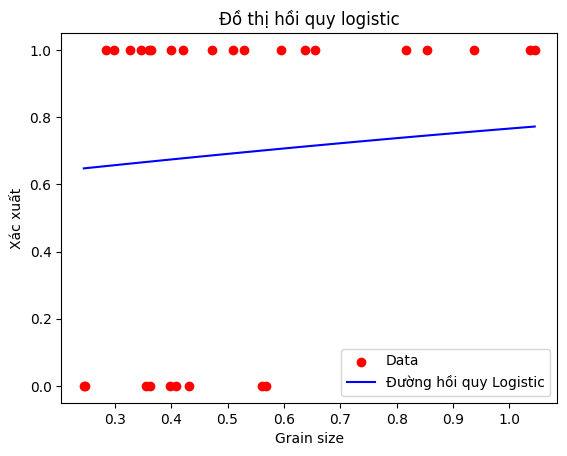

In [14]:
theta0, theta1 = gradient_descent(X, Y, theta0, theta1, alpha, iterations)
print(f"theta0 = {theta0:.6f}; theta1 = {theta1:.6f}")

# Plotting the results
plt.scatter(X, Y, color='red', label='Data')

# Calculate predicted probabilities and plot the decision boundary
X_values = np.linspace(min(X), max(X), 100)
Y_pred = pred(theta0, theta1, X_values)
plt.plot(X_values, Y_pred, color='blue', label=f'Đường hồi quy Logistic')

plt.xlabel('Grain size')
plt.ylabel('Xác xuất')
plt.title('Đồ thị hồi quy logistic')
plt.legend()
plt.show()
